In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [45]:
# DATASET 

# Read in the dataset
df = pd.read_csv("Student_performance_data _.csv")
# Convert data from a 0-4 scale to 0-5 scale
df['GPA'] = (df['GPA'] / 4) * 5
# Print data
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,3.661494,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.803644,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.140753,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.567773,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.610076,4.0


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


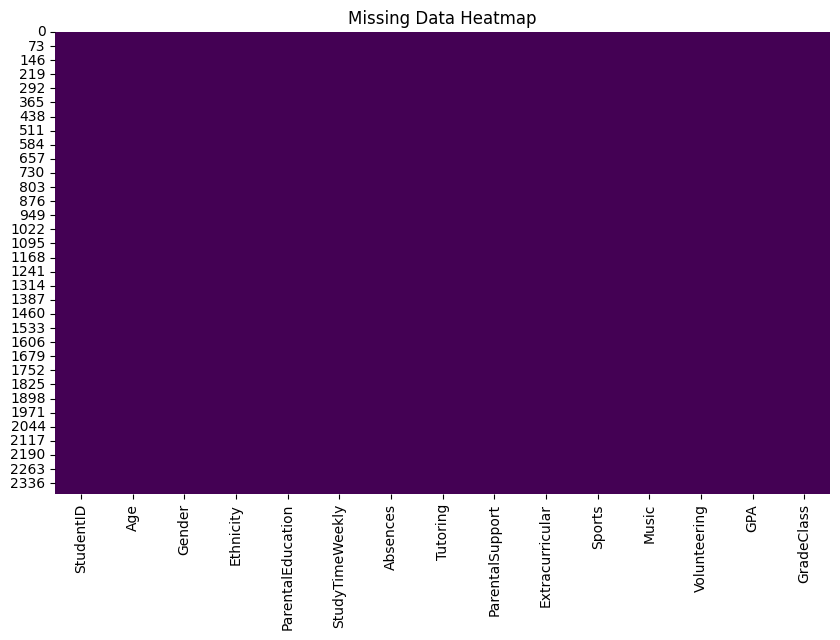

In [46]:
# MISSING DATA

# Check for missing values
missing_data = df.isnull().sum()

# Print missing data
print(missing_data)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [47]:
# CATEGORICAL DATA HANDLING

# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'ParentalEducation'], drop_first=True)

# Convert boolean columns to integers (1/0)
boolean_columns = df_encoded.select_dtypes(include=['bool']).columns  
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

# Display the first few rows of the modified dataframe
df_encoded.head()


,StudentID,Age,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4
0,1001,17,19.833723,7,1,2,0,0,1,0,3.661494,2.0,1,0,0,0,0,1,0,0
1,1002,18,15.408756,0,0,1,0,0,0,0,3.803644,1.0,0,0,0,0,1,0,0,0
2,1003,15,4.210570,26,0,2,0,0,0,0,0.140753,4.0,0,0,1,0,0,0,1,0
3,1004,17,10.028829,14,0,3,1,0,0,0,2.567773,3.0,1,0,0,0,0,0,1,0
4,1005,17,4.672495,17,1,3,0,0,0,0,1.610076,4.0,1,0,0,0,0,1,0,0


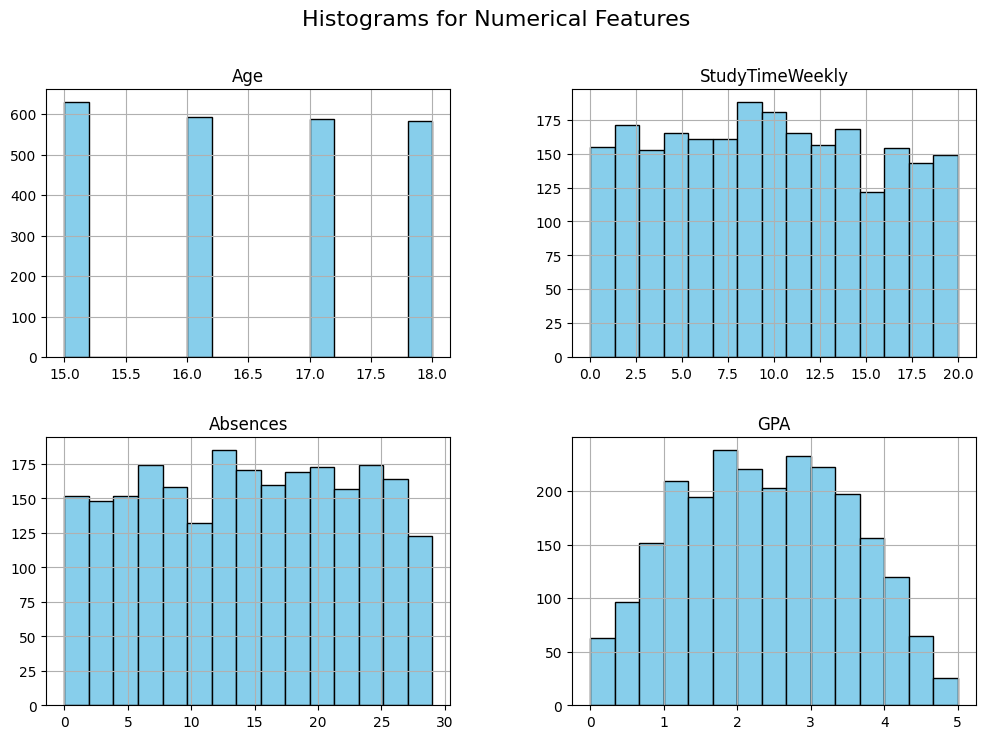

<Figure size 1200x800 with 0 Axes>

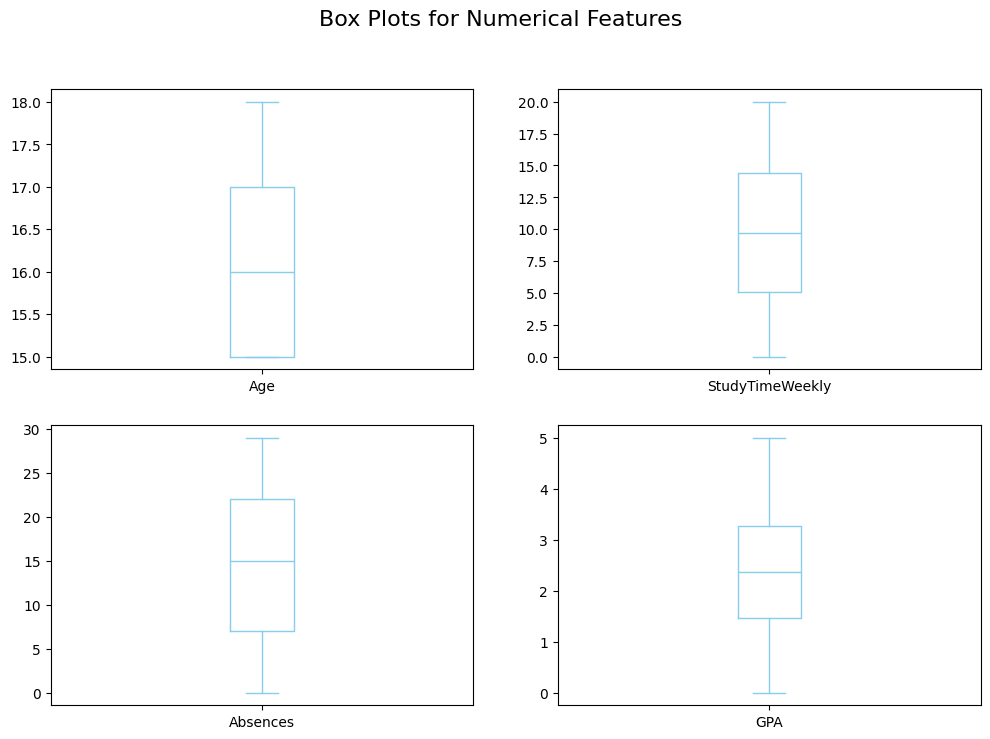

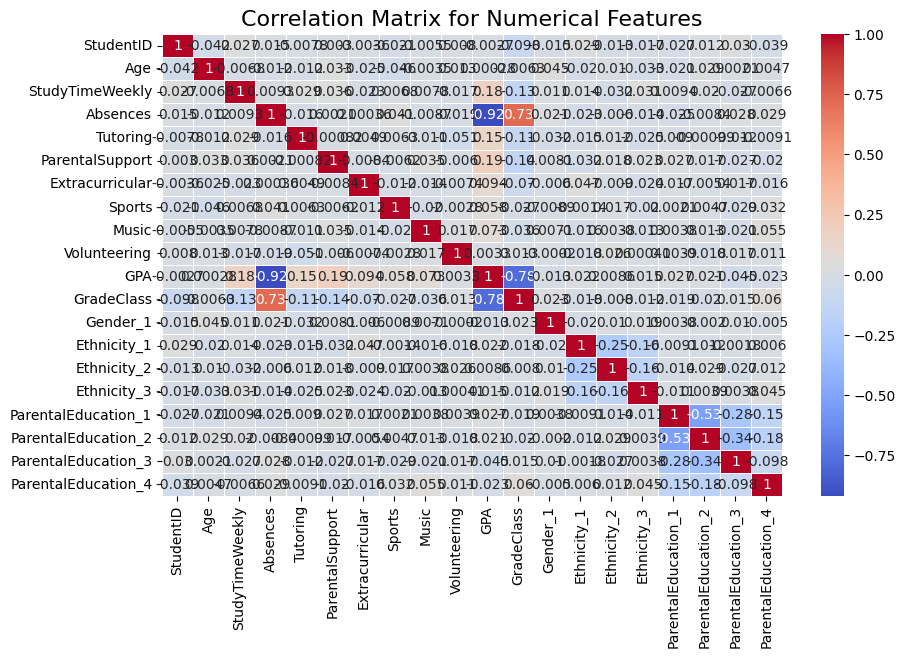

In [48]:
# DISTRIBUTIONS FOR NUMERICAL FEATURES 

# List of numerical features
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Create histograms for each numerical feature
df_encoded[numerical_features].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numerical Features', fontsize=16)
plt.show()

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
df_encoded[numerical_features].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12, 8), color='skyblue')
plt.suptitle('Box Plots for Numerical Features', fontsize=16)
plt.show()

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features', fontsize=16)
plt.show()

In [65]:
# Remove unecessary features by dropping the columns
df_updated = df.drop(columns=['StudentID', 'Age', 'Volunteering', 'Ethnicity', 'ParentalEducation'])

X = df_updated.drop(columns=['GPA', 'GradeClass'])  
y = df_updated['GPA'] 

# Split the data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [74]:
# LINEAR REGRESSION

# Linear Model without scaling
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)
y_val_pred_lr = lr_model.predict(X_val)
y_train_pred_lr = lr_model.predict(X_train)

# Linear Model with scaling
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)
y_val_pred_lr_scaled = lr_model_scaled.predict(X_val_scaled)
y_train_pred_lr_scaled = lr_model_scaled.predict(X_train_scaled)

# Calculate RMSE for both linear regression models validation data
rmse_val_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
rmse_val_lr_scaled = np.sqrt(mean_squared_error(y_val, y_val_pred_lr_scaled))

# Calculate RMSE for both linear regression models training data
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_train_lr_scaled = np.sqrt(mean_squared_error(y_train, y_train_pred_lr_scaled))

# R² for validation data
r2_val_lr = r2_score(y_val, y_val_pred_lr)
r2_val_lr_scaled = r2_score(y_val, y_val_pred_lr_scaled)

# R² for training data
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_train_lr_scaled = r2_score(y_train, y_train_pred_lr_scaled)

In [73]:
# RANDOM FOREST 

# Random Forest without scaling
rf_model= RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)
y_train_pred_rf = rf_model.predict(X_train)


# Random Forest with scaling
rf_model_scaled = RandomForestRegressor(random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train)
y_val_pred_rf_scaled = rf_model_scaled.predict(X_val_scaled)
y_train_pred_rf_scaled = rf_model_scaled.predict(X_train_scaled)

# Calculate RMSE for both Random Forest models validation data
rmse_val_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
rmse_val_rf_scaled = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_scaled))

# Calculate RMSE for both Random Forest models training data
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_train_rf_scaled = np.sqrt(mean_squared_error(y_train, y_train_pred_rf_scaled))

# R² for validation data
r2_val_rf = r2_score(y_val, y_val_pred_rf)
r2_val_rf_scaled = r2_score(y_val, y_val_pred_rf_scaled)

# R² for training data
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_train_rf_scaled = r2_score(y_train, y_train_pred_rf_scaled)


In [75]:
# MLP REGRESSOR

# MLP Regressor without scaling
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_val_pred_mlp = mlp_model.predict(X_val)
y_train_pred_mlp = mlp_model.predict(X_train)

# MLP Regressor with scaling
mlp_model_scaled = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_model_scaled.fit(X_train_scaled, y_train)
y_val_pred_mlp_scaled = mlp_model_scaled.predict(X_val_scaled)
y_train_pred_mlp_scaled = mlp_model_scaled.predict(X_train_scaled)

# Calculate RMSE for both MLP models validation data
rmse_val_mlp = np.sqrt(mean_squared_error(y_val, y_val_pred_mlp))
rmse_val_mlp_scaled = np.sqrt(mean_squared_error(y_val, y_val_pred_mlp_scaled))

# Calculate RMSE for both MLP models training data
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_pred_mlp))
rmse_train_mlp_scaled = np.sqrt(mean_squared_error(y_train, y_train_pred_mlp_scaled))

# R² for validation data
r2_val_mlp = r2_score(y_val, y_val_pred_mlp)
r2_val_mlp_scaled = r2_score(y_val, y_val_pred_mlp_scaled)

# R² for training data
r2_train_mlp = r2_score(y_train, y_train_pred_mlp)
r2_train_mlp_scaled = r2_score(y_train, y_train_pred_mlp_scaled)

In [80]:
# Non-Scaled Errors

table = PrettyTable()
table.field_names = ["Model", "Non-Scaled RMSE (validation)", "Non-Scaled RMSE (training)", "R^2 Score (validation)", "R^2 Score (training)"]
table.add_row(["Linear Regression", round(rmse_val_lr, 2), round(rmse_train_lr, 2), round(r2_val_lr, 2), round(r2_train_lr, 2)])
table.add_row(["Random Forest", round(rmse_val_rf, 2), round(rmse_train_rf, 2), round(r2_val_rf, 2), round(r2_train_rf, 2)])
table.add_row(["MLP Regressor", round(rmse_val_mlp, 2), round(rmse_train_mlp, 2), round(r2_val_mlp, 2), round(r2_train_mlp, 2)])

table

Model,Non-Scaled RMSE (validation),Non-Scaled RMSE (training),R^2 Score (validation),R^2 Score (training)
Linear Regression,0.24,0.25,0.95,0.95
Random Forest,0.29,0.11,0.93,0.99
MLP Regressor,0.26,0.26,0.95,0.95


In [82]:
# Scaled Errors

table =  PrettyTable()
table.field_names = ["Model", "Scaled RMSE (validation)", "Scaled RMSE (training)", "R^2 Score (validation)", "R^2 Score (training)"]
table.add_row(["Linear Regression", round(rmse_val_lr_scaled, 2), round(rmse_train_lr_scaled, 2), round(r2_val_lr_scaled, 2), round(r2_train_lr_scaled, 2)])
table.add_row(["Random Forest", round(rmse_val_rf_scaled, 2), round(rmse_train_rf_scaled, 2), round(r2_val_rf_scaled, 2), round(r2_train_rf_scaled, 2)])
table.add_row(["MLP Regressor", round(rmse_val_mlp_scaled, 2), round(rmse_train_mlp_scaled, 2), round(r2_val_mlp_scaled, 2), round(r2_train_mlp_scaled, 2)])

table 

Model,Scaled RMSE (validation),Scaled RMSE (training),R^2 Score (validation),R^2 Score (training)
Linear Regression,0.24,0.25,0.95,0.95
Random Forest,0.29,0.11,0.93,0.99
MLP Regressor,0.26,0.23,0.95,0.96


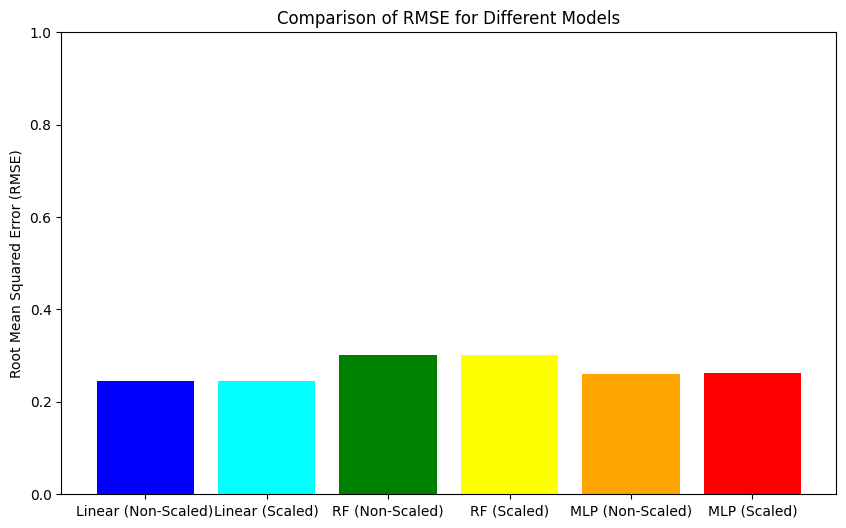

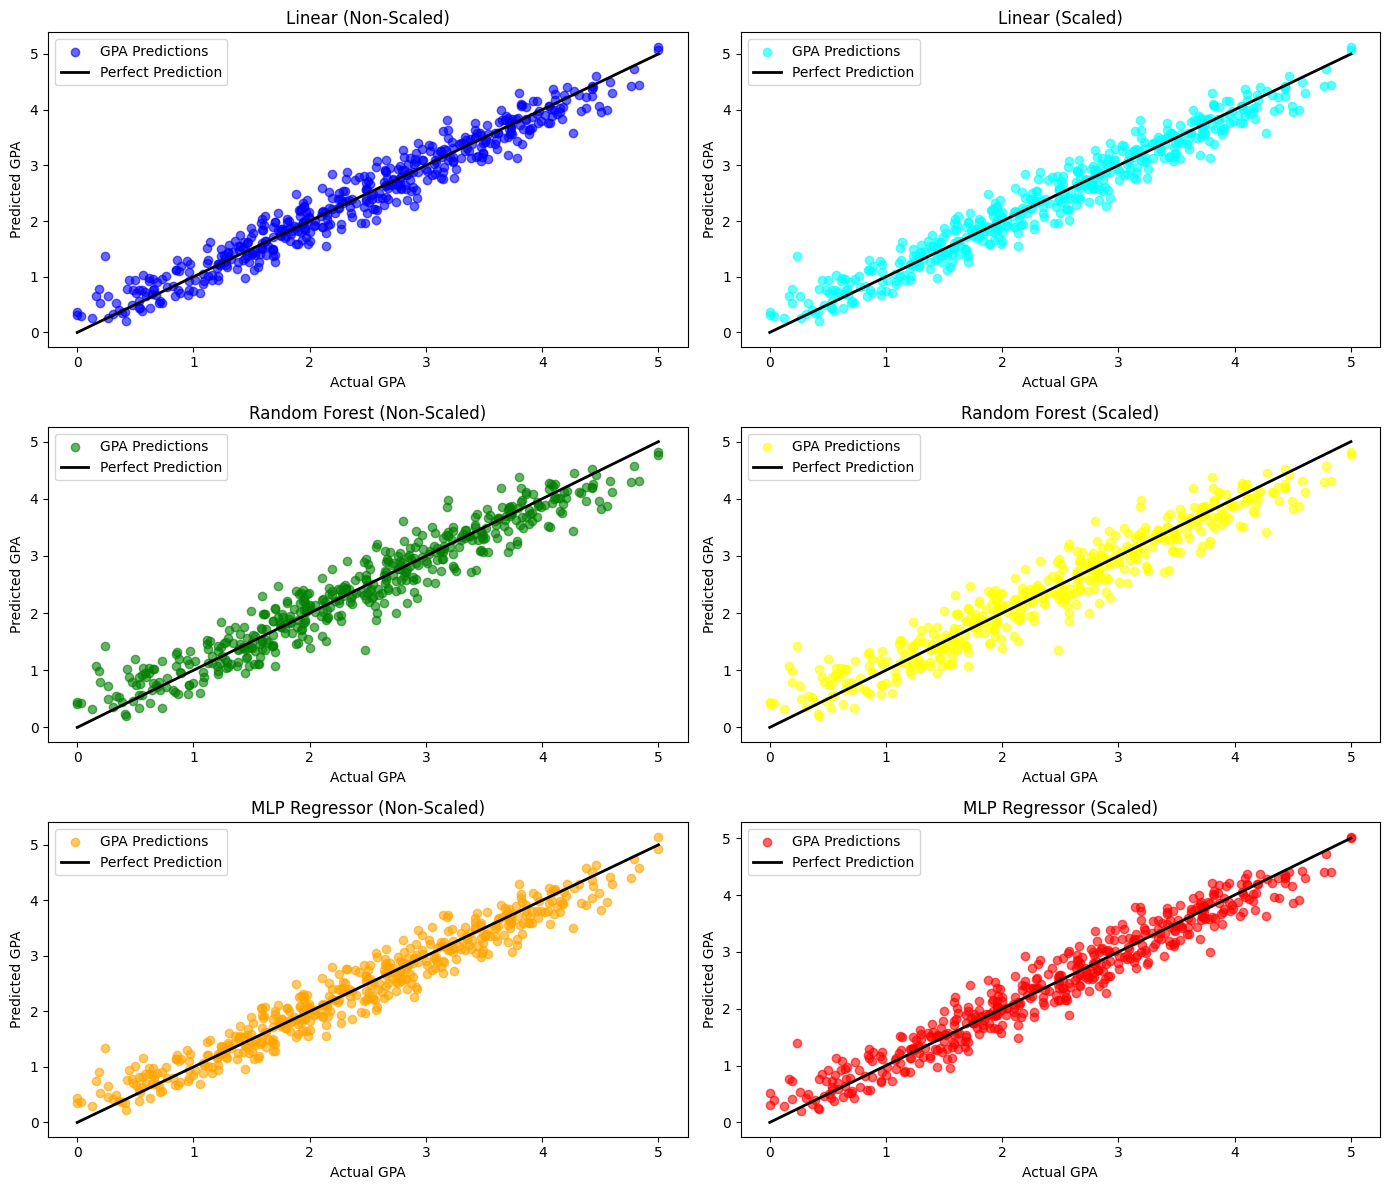

In [56]:
# VISUALIZATION 

# Prepare data for visualization
rmse_values = [rmse_val_lr, rmse_val_lr_scaled, rmse_val_rf, rmse_val_rf_scaled, rmse_val_mlp, rmse_val_mlp_scaled]
labels = ['Linear (Non-Scaled)', 'Linear (Scaled)', 'RF (Non-Scaled)', 'RF (Scaled)', 'MLP (Non-Scaled)', 'MLP (Scaled)']

# Create a bar plot to compare RMSE values
plt.figure(figsize=(10, 6))
plt.bar(labels, rmse_values, color=['blue', 'cyan', 'green', 'yellow', 'orange', 'red'])
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.ylim(0, 1)  # Adjust y-axis limits
plt.show()

def createPlot(ax, y_val, y_val_pred, title, plot_color):
    ax.scatter(y_val, y_val_pred, color=plot_color, label='GPA Predictions', alpha=0.6)
    ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='black', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Actual GPA')
    ax.set_ylabel('Predicted GPA')
    ax.set_title(title)
    ax.legend()

def plot_model_predictions(y_val, y_val_pred_no_scaling, y_val_pred_scaled, 
                           y_val_pred_rf_no_scaling, y_val_pred_rf_scaled, 
                           y_val_pred_mlp_no_scaling, y_val_pred_mlp_scaled):

    fig, axs = plt.subplots(3, 2, figsize=(14, 12))  # Create a grid with 3 rows and 2 columns
    createPlot(axs[0, 0], y_val, y_val_pred_no_scaling, 'Linear (Non-Scaled)', 'blue')
    createPlot(axs[0, 1], y_val, y_val_pred_scaled, 'Linear (Scaled)', 'cyan')
    createPlot(axs[1, 0], y_val, y_val_pred_rf_no_scaling, 'Random Forest (Non-Scaled)', 'green')
    createPlot(axs[1, 1], y_val, y_val_pred_rf_scaled, 'Random Forest (Scaled)', 'yellow')
    createPlot(axs[2, 0], y_val, y_val_pred_mlp_no_scaling, 'MLP Regressor (Non-Scaled)', 'orange')
    createPlot(axs[2, 1], y_val, y_val_pred_mlp_scaled, 'MLP Regressor (Scaled)', 'red')

    plt.tight_layout()
    plt.show()

# Call the function with the actual and predicted values
plot_model_predictions(y_val, y_val_pred_lr, y_val_pred_lr_scaled, 
                       y_val_pred_rf, y_val_pred_rf_scaled, 
                       y_val_pred_mlp, y_val_pred_mlp_scaled)